# Analisis de completitud (ok)
# Rellenar los vacios ( imputacion )(ok)
* Numericos (ok)
* Categoricos (en el lenguaje R puedo usar el paquete mice)(ok)

# variables predictoras y a predecir (ok)
### aprendizaje supervisado (etiquetas) y no supervisado (no tengo las etiquetas),# aprendizaje semi supervisado ,aprendizaje por refuerzo
# Escalar los valores (minmax scaler , standarscaler) (ok)
# pca ( MODULOS AVANZADOS ) ( DE LA VARIANZA ME DICE QUE COLUMNAS ME SIRVEN Y CUALES NO )
# Si tengo variables categoricas (Dummy o onehot_encoding )(ok)
# Conjunto de test y de train (prueba y de entrenamiento )(ok)
# seleccionar y entrenar un modelo de IA 
# Evaluar las caracteristica 
# metricas ( Curva ROC , AUC, Matris de confusion )

# Bonuss ( pipelines) Popote

In [58]:
import pandas as pd
import numpy as np 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
import seaborn # graficar 

In [3]:
# creo una copia
df=seaborn.load_dataset('titanic')

In [4]:
# cargo los datos 
titanic=seaborn.load_dataset('titanic')

In [5]:
# guardo los datos en csv , y se cre un archivo .bi
titanic.to_csv(r"data/df_titanic.csv")

In [6]:
# vemos el numero de filas y columnas 
titanic.shape

(891, 15)

In [7]:
# Porcentaje por columna vacia 
# si yo tengo arriba del 40 % vacio ( me conviene borrarla ) # si hago esto , estaria sesgando el modelo 
titanic.isna().sum()/titanic.shape[0]

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [8]:
titanic.embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [9]:
# esto es un ejemplo de como borrar varias columnas con una instruccion 
#titanic.drop(columns=["deck","who"])

In [10]:
# como borro la columna que no cumple con este criterio 
titanic.drop(columns="deck",inplace=True)

In [11]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [12]:
titanic.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [13]:
# Que significa NAN
#Not Number Avalable ( sin valor disponible )

In [14]:
# Que hace la validacion de isna( da una lista de boleanos )
titanic.age.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: age, Length: 891, dtype: bool

# Imputacion valores numericos 

In [15]:
#como rellenar con la media 
titanic['age'].fillna(titanic['age'].mean(), inplace=True)

# Eliminar las filas 

In [16]:
# Eliminar todas filas vacias 177, 
#titanic.dropna(inplace=True)

# Como imputar valores categoricos

In [17]:
#llena los valores faltantes con la moda , el valor que mas se repite
titanic["embarked"].fillna(titanic["embarked"].mode(),inplace=True)

C:\Users\jacj2\AppData\Local\Temp\ipykernel_29324\1658642354.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["embarked"].fillna(titanic["embarked"].mode(),inplace=True)


In [18]:
# como imputar valores categoricos

titanic['age'].fillna(titanic['age'].mean(), inplace=True)

# Solucion de simple imputer 

In [19]:
True==1

True

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [21]:
#for 
#np.where 
lista_numeros_number_adult_male=[]
for i in titanic.adult_male:
    if i==True:
        #print(f"Entro el true: {i}")
        lista_numeros_number_adult_male.append(1)
    elif i==False:
        #print(f"Entro el false: {i}")
        lista_numeros_number_adult_male.append(0)


In [22]:
def conversor_bool_to_int(nombre_columna):
    lista_interna =[]
    for i in titanic[nombre_columna]:
        if i==True:
            lista_interna.append(1)
        elif i==False:
            lista_interna.append(0)
    return lista_interna

In [23]:
titanic["alone"]=np.where( titanic["alone"],1,0)
titanic["adult_male"]=np.where(titanic["adult_male"],1,0)

In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    int32   
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    int32   
dtypes: category(1), float64(2), int32(2), int64(4), object(5)
memory usage: 84.7+ KB


In [25]:
titanic.select_dtypes("number")

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
0,0,3,22.000000,1,0,7.2500,1,0
1,1,1,38.000000,1,0,71.2833,0,0
2,1,3,26.000000,0,0,7.9250,0,1
3,1,1,35.000000,1,0,53.1000,0,0
4,0,3,35.000000,0,0,8.0500,1,1
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,1
887,1,1,19.000000,0,0,30.0000,0,1
888,0,3,29.699118,1,2,23.4500,0,0
889,1,1,26.000000,0,0,30.0000,1,1


In [26]:
imp_mean = SimpleImputer(missing_values=np.nan, # tipo de valor faltante
                         strategy='mean')# Media 
#sobre escribo en las columnas lo el array de valores numericos
titanic[titanic.select_dtypes("number").columns]=imp_mean.fit_transform(titanic.select_dtypes("number")) # mas de una columna 

# Mencionar que ehora el objeto es un aray de numpy, necesito recordar como operar numpy ( a veces no es tan facil)

# Como seleccionar solo los numericos de los dataframe 

In [27]:
titanic.select_dtypes("number")

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
0,0.0,3.0,22.000000,1.0,0.0,7.2500,1.0,0.0
1,1.0,1.0,38.000000,1.0,0.0,71.2833,0.0,0.0
2,1.0,3.0,26.000000,0.0,0.0,7.9250,0.0,1.0
3,1.0,1.0,35.000000,1.0,0.0,53.1000,0.0,0.0
4,0.0,3.0,35.000000,0.0,0.0,8.0500,1.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.000000,0.0,0.0,13.0000,1.0,1.0
887,1.0,1.0,19.000000,0.0,0.0,30.0000,0.0,1.0
888,0.0,3.0,29.699118,1.0,2.0,23.4500,0.0,0.0
889,1.0,1.0,26.000000,0.0,0.0,30.0000,1.0,1.0


In [28]:
titanic.select_dtypes("object")

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no
...,...,...,...,...,...
886,male,S,man,Southampton,no
887,female,S,woman,Southampton,yes
888,female,S,woman,Southampton,no
889,male,C,man,Cherbourg,yes


# dummy vs one Hot encoder

In [29]:
titanic["sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [30]:
#Que es un valor dummy 
pd.get_dummies(titanic["sex"])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [31]:
pd.get_dummies(titanic.embarked)

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


# diferencias entre atributos de un modulo/clase de sklearn 
* fit (solo entrena)
* fit_transform ( entrena y transforma )
* transform (solo transforma , y ya debe estar entrenado)

In [32]:
titanic.select_dtypes("object")

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no
...,...,...,...,...,...
886,male,S,man,Southampton,no
887,female,S,woman,Southampton,yes
888,female,S,woman,Southampton,no
889,male,C,man,Cherbourg,yes


In [33]:
titanic["class"]

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class, Length: 891, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

In [34]:
#convertimos en array 
titanic.select_dtypes("object").values

array([['male', 'S', 'man', 'Southampton', 'no'],
       ['female', 'C', 'woman', 'Cherbourg', 'yes'],
       ['female', 'S', 'woman', 'Southampton', 'yes'],
       ...,
       ['female', 'S', 'woman', 'Southampton', 'no'],
       ['male', 'C', 'man', 'Cherbourg', 'yes'],
       ['male', 'Q', 'man', 'Queenstown', 'no']], dtype=object)

In [35]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoder=encoder.fit(titanic.select_dtypes(include=["object", "category"]).values)# 3 instrucciones 
columnas_transformadas=encoder.transform(titanic.select_dtypes(include=["object", "category"]).values).toarray()#

In [36]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
columnas_transformadas_ordinales = encoder.fit_transform(titanic.select_dtypes(include=["object", "category"]).values)
columnas_transformadas_ordinales

array([[1., 2., 2., 1., 2., 0.],
       [0., 0., 0., 2., 0., 1.],
       [0., 2., 2., 2., 2., 1.],
       ...,
       [0., 2., 2., 2., 2., 0.],
       [1., 0., 0., 1., 0., 1.],
       [1., 1., 2., 1., 1., 0.]])

In [37]:
titanic[titanic.select_dtypes("object").columns]

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no
...,...,...,...,...,...
886,male,S,man,Southampton,no
887,female,S,woman,Southampton,yes
888,female,S,woman,Southampton,no
889,male,C,man,Cherbourg,yes


In [38]:
titanic[titanic.select_dtypes(include=["object", "category"]).columns]=columnas_transformadas_ordinales

In [39]:
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S', nan], dtype=object),
 array(['First', 'Second', 'Third'], dtype=object),
 array(['child', 'man', 'woman'], dtype=object),
 array(['Cherbourg', 'Queenstown', 'Southampton', nan], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [40]:
#La importancia de apilar instrucciones 
# importancia de entender el apilamiento de instrucciones 

### Veamos como tengo el dataframe
Nota : todos ya no tienen nulos y ya son flotantes 

In [41]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    float64
 1   pclass       891 non-null    float64
 2   sex          891 non-null    float64
 3   age          891 non-null    float64
 4   sibsp        891 non-null    float64
 5   parch        891 non-null    float64
 6   fare         891 non-null    float64
 7   embarked     889 non-null    float64
 8   class        891 non-null    float64
 9   who          891 non-null    float64
 10  adult_male   891 non-null    float64
 11  embark_town  889 non-null    float64
 12  alive        891 non-null    float64
 13  alone        891 non-null    float64
dtypes: float64(14)
memory usage: 97.6 KB


# Aprendamos a Separar variables 
* Variable(s) predictoras
* Variable(s) a predecir 

In [88]:
#Vamos a obtener las posibles variables para predecir un resultado
titanic.dropna(inplace=True) # borro 1 flaltante en el df para 2 columnas 
x=titanic.drop(columns="alive")
#separo la(s) columnas para predecir 
y=titanic["alive"]

In [89]:
#Como se ve X 
x.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,2.0,1.0,1.0,2.0,0.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,0.0,2.0,0.0,0.0,0.0


In [90]:
#Como se ve Y
y[:2]

0    0.0
1    1.0
Name: alive, dtype: float64

# Separar predictoras a predecir 
Nota :solo se escala el valor de las variables predictoras

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# mover librerias hacia arriba 

In [92]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [93]:
titanic
#ya tiene selecion , analisis de completitu , analisis de objetois , imputado , onehotencoder, (dummy),Separe las variables 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0.0,3.0,1.0,22.000000,1.0,0.0,7.2500,2.0,2.0,1.0,1.0,2.0,0.0,0.0
1,1.0,1.0,0.0,38.000000,1.0,0.0,71.2833,0.0,0.0,2.0,0.0,0.0,1.0,0.0
2,1.0,3.0,0.0,26.000000,0.0,0.0,7.9250,2.0,2.0,2.0,0.0,2.0,1.0,1.0
3,1.0,1.0,0.0,35.000000,1.0,0.0,53.1000,2.0,0.0,2.0,0.0,2.0,1.0,0.0
4,0.0,3.0,1.0,35.000000,0.0,0.0,8.0500,2.0,2.0,1.0,1.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.000000,0.0,0.0,13.0000,2.0,1.0,1.0,1.0,2.0,0.0,1.0
887,1.0,1.0,0.0,19.000000,0.0,0.0,30.0000,2.0,0.0,2.0,0.0,2.0,1.0,1.0
888,0.0,3.0,0.0,29.699118,1.0,2.0,23.4500,2.0,2.0,2.0,0.0,2.0,0.0,0.0
889,1.0,1.0,1.0,26.000000,0.0,0.0,30.0000,0.0,0.0,1.0,1.0,0.0,1.0,1.0


In [94]:
#Solo para las variables categoricas 
#variable objetivo ( dicotomica (si o no , 0 y 1))
[ "class"]
#las variables que eran categoricas (strings)
["sex","embarked","who","embark_town"]
#Cuales eran las variables numericas continuas(1.2,8.3,etc)
["age","fare"]
# el resto ya eran numero entero(como tipo categoricas) (0,1,2,3)
["pclass","sibsp","parch","adult_male","alone"]

['pclass', 'sibsp', 'parch', 'adult_male', 'alone']

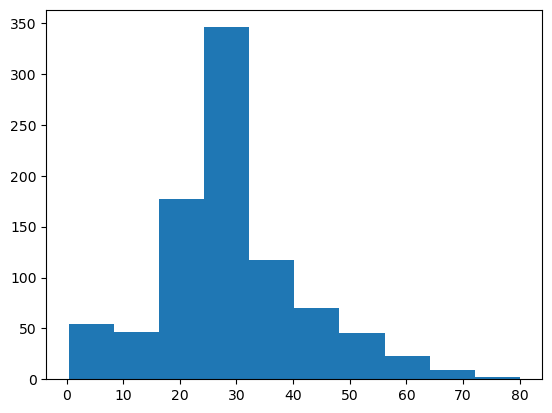

In [95]:
# Esta imputado 
import matplotlib.pyplot as plt

plt.hist(titanic["age"])
plt.show()

In [96]:
#defino el metodo
sc=StandardScaler()
#Entreno para escalar
sc=sc.fit(titanic[["age","fare"]])
x_sc_scaled=sc.transform(titanic[["age","fare"]])
x_sc_scaled

array([[-0.59049493, -0.50023975],
       [ 0.64397101,  0.78894661],
       [-0.28187844, -0.48664993],
       ...,
       [ 0.00352373, -0.17408416],
       [-0.28187844, -0.0422126 ],
       [ 0.18104628, -0.49017322]])

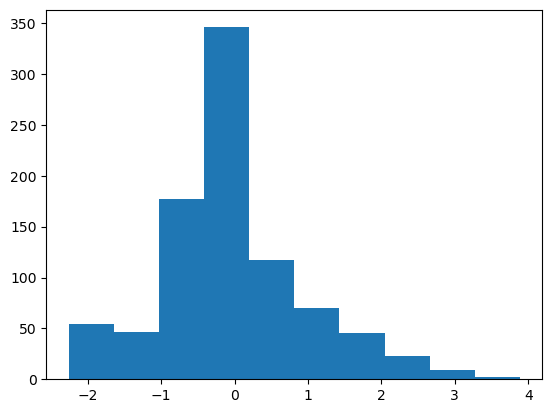

In [97]:
plt.hist(x_sc_scaled[:,0])
plt.show()

In [98]:
#defino el metodo
sc=MinMaxScaler()
#Entreno para escalar
sc=sc.fit(titanic[["age","fare"]])
x_sc_min_max=sc.transform(titanic[["age","fare"]])
x_sc_min_max

array([[0.27117366, 0.01415106],
       [0.4722292 , 0.13913574],
       [0.32143755, 0.01546857],
       ...,
       [0.36792055, 0.04577135],
       [0.32143755, 0.0585561 ],
       [0.39683338, 0.01512699]])

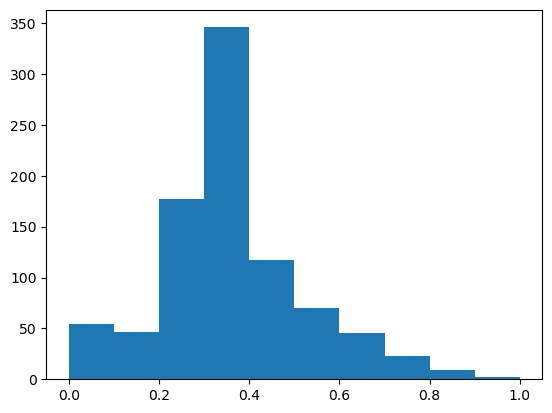

In [99]:
plt.hist(x_sc_min_max[:,0])
plt.show()

In [100]:
#defino el metodo
sc=StandardScaler()
#Entreno para escalar
sc=sc.fit(x[["age","fare"]])
x_sc_scaled=sc.transform(x[["age","fare"]])
x_sc_scaled

array([[-0.59049493, -0.50023975],
       [ 0.64397101,  0.78894661],
       [-0.28187844, -0.48664993],
       ...,
       [ 0.00352373, -0.17408416],
       [-0.28187844, -0.0422126 ],
       [ 0.18104628, -0.49017322]])

In [101]:
x_sc_scaled.shape

(889, 2)

In [102]:
#como meto este escalado a el df 
x[["age","fare"]]=x_sc_scaled

In [103]:

X_train, X_test, y_train, y_test = train_test_split(x,#Variables a las cuales ya les aplique el preprocesado
                                                     y, #la columna que tiene las repuesta (Si sobrevivio)
                                                     test_size=0.20,# Esto es de evaluacion (y es el 20% , entreno con el 80%) 
                                                     random_state=1996)#Para reproucibilidad del experiemnto ( Para que nos de los mismo resultados  )

#Notas :

* x_train y y_train es para entrenar 
* x_tests es para predecir y_pred( y Predicha : los resultos preichos ( lo que me entrego el mododelo))

* y_pred lo comparo con y_test (Que tan buen modelo cree) (y_tests solo me sirve para medir que tanto aprendio el modelo de los datos )

<Axes: xlabel='survived'>

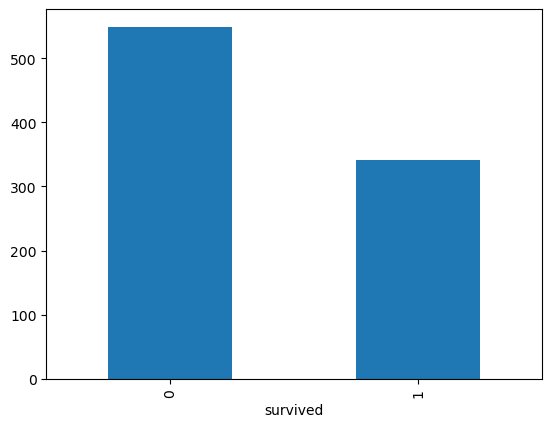

In [104]:
# validamos el desbalanceo de clases
df["survived"].value_counts().plot(kind="bar")

In [105]:
X_train.dropna(inplace=True)

In [106]:
X_train.shape

(711, 13)

In [107]:
y_train.shape

(711,)

In [117]:
lg=LogisticRegression(solver="liblinear",#{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}
                    penalty="l2",# regularizacion
                    class_weight="balanced")# metodo o libreria (herramienta)
lg.fit(X_train,y_train)# Entreno y esto ya predice 


LogisticRegression(class_weight='balanced', solver='liblinear')

In [118]:
# predigo con los datos para validar (test)
y_pred=lg.predict(X_test)

In [ ]:
#Asi son las etiquetas que use en el modelo
y_pred

array([0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1.])

In [131]:
#Matriz de confusion ( evaluar que tan bueno es el modelo)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[109,   0],
       [  0,  69]], dtype=int64)

In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       109
         1.0       1.00      1.00      1.00        69

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



In [129]:
y_test.index

Index([ 92, 460, 778, 233, 560, 417, 204, 315, 650, 633,
       ...
       800, 412, 694, 835, 119,  51, 558, 189, 385, 621],
      dtype='int64', length=178)

In [138]:
# Predecir probabilidades 
y_pred_prob=lg.predict_proba(X_test)

In [ ]:
# los datos de la prediccion del conjunto de validacion : cualesson las caracteristicas para decir que existe una tendencia 
df.iloc[y_test.index,:]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
92,0,1,male,46.0,1,0,61.1750,S,First,man,True,E,Southampton,no,False
460,1,1,male,48.0,0,0,26.5500,S,First,man,True,E,Southampton,yes,True
778,0,3,male,NaN,0,0,7.7375,Q,Third,man,True,NaN,Queenstown,no,True
233,1,3,female,5.0,4,2,31.3875,S,Third,child,False,NaN,Southampton,yes,False
560,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,0,3,male,21.0,0,0,7.8000,S,Third,man,True,NaN,Southampton,no,True
558,1,1,female,39.0,1,1,79.6500,S,First,woman,False,E,Southampton,yes,False
189,0,3,male,36.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
385,0,2,male,18.0,0,0,73.5000,S,Second,man,True,NaN,Southampton,no,True


<Axes: ylabel='count'>

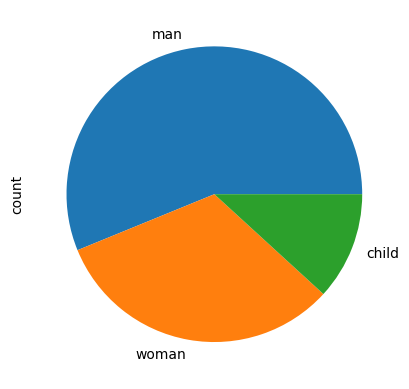

In [136]:
df.iloc[y_test.index,:].who.value_counts().plot(kind="pie")

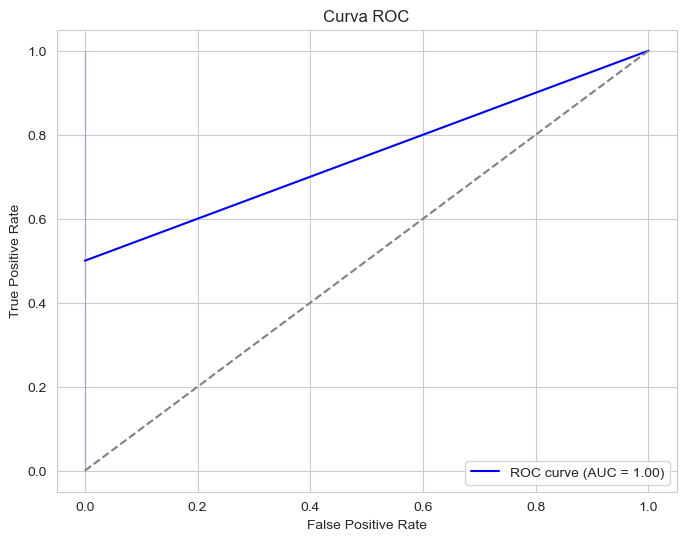

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Asumiendo que y_test son las etiquetas reales y y_pred_prob las probabilidades predichas
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Gráfica con Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.lineplot(x=fpr, y=tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

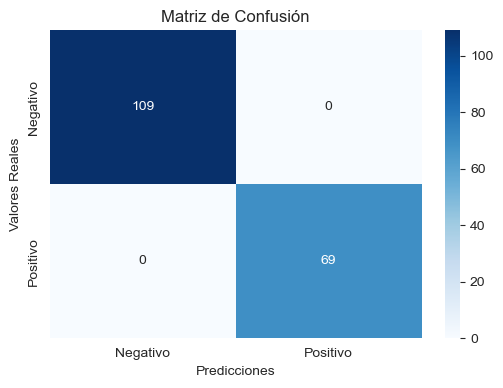

In [141]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar matriz de confusión con Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

In [148]:
import pickle
import joblib

# Guardar el modelo
with open('models/regresion/model_titanic_100_acuracy.pkl', 'wb') as archivo:
    pickle.dump(lg, archivo)
# 6 o 7gb No guarda bien ( archivo binario)

# Guardar el modelo
joblib.dump(lg, 'models/regresion/model_titanic_100_acuracy.joblib')# archivo binario
# 20gb 


['models/regresion/model_titanic_100_acuracy.joblib']

# Modelo de IA 

# Ejercicio semana 1
*** Cree un analisis de completitud 

Cree una grafica de histograma con matplotliob de Titanic (variable numerica)
Cree una grafica de barras con pandas del f titanic (variable categorica)
Bonis 

Data: El dataset lo pueden obtener de seabon
Criterios de aceptacion :
Graficas con titulo
Graficas con limites en eje x y y 
Etiquetas (labels) en X y Y
Bonus : Modificación de color y tamaño de letra



#Ejercicio propuesto semana 2


Dado el dataframe :
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

haga todo el preprocesamiento 

hola :
Aunado a ello el proyecto 1 : con el cual se va a extender un reconocimiento de dominio de Analisis de datos con python :

# Ejercicio semana 1
*** Cree un analisis de completitud 

Cree una grafica de histograma con matplotliob de Titanic (variable numerica)
Cree una grafica de barras con pandas del f titanic (variable categorica)


Data: El dataset lo pueden obtener de seabon
Criterios de aceptacion :
Graficas con titulo
Graficas con limites en eje x y y 
Etiquetas (labels) en X y Y
Bonus : Modificación de color y tamaño de letra

